In [6]:
from sklearn import datasets

In [11]:
wine=datasets.load_wine()

In [13]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [15]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [17]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
X=wine.data
y=wine.target

In [27]:
X.shape,y.shape

((178, 13), (178,))

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## generating model for k=3

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [31]:
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.6851851851851852


## generating model for k=5

In [32]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7222222222222222


## generating model for k=7

In [33]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7407407407407407


## how to improve knn?--- standardisation is the key

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [36]:
X # seee x_scaled is standardised now

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42,stratify=y)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9444444444444444


In [38]:
#yesss accuracy increaseddd

## cross validation

In [39]:
 from sklearn.model_selection import  cross_val_score

In [40]:
neighbors=list(range(1,50,2))
neighbors

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [44]:
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_scaled,y,cv=10,scoring='accuracy')
    print(score)
    cv_scores.append(score.mean())

[0.83333333 0.94444444 0.94444444 0.94444444 1.         0.94444444
 1.         1.         0.88235294 0.94117647]
[0.94444444 0.94444444 0.94444444 0.94444444 1.         0.94444444
 1.         1.         0.88235294 0.94117647]
[0.94444444 0.94444444 0.94444444 0.94444444 1.         0.94444444
 1.         1.         0.94117647 0.94117647]
[1.         0.94444444 0.94444444 0.94444444 1.         0.88888889
 1.         1.         0.94117647 1.        ]
[0.94444444 1.         0.94444444 0.94444444 1.         0.94444444
 1.         1.         0.94117647 1.        ]
[1.         1.         0.94444444 0.94444444 1.         0.94444444
 1.         0.94444444 0.94117647 1.        ]
[0.94444444 1.         0.94444444 0.94444444 1.         0.88888889
 1.         1.         0.94117647 1.        ]
[0.94444444 1.         0.94444444 0.94444444 1.         0.88888889
 1.         1.         0.94117647 1.        ]
[0.94444444 0.94444444 0.94444444 0.94444444 1.         0.94444444
 1.         1.         1.    

In [43]:
cv_scores

[0.9434640522875817,
 0.9545751633986927,
 0.9604575163398692,
 0.9663398692810456,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9663398692810456,
 0.9722222222222221,
 0.9722222222222221,
 0.9722222222222221,
 0.9833333333333334,
 0.9718954248366012,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9777777777777779,
 0.9777777777777779,
 0.9722222222222221,
 0.9722222222222221,
 0.9663398692810456,
 0.9663398692810456,
 0.9604575163398692,
 0.9604575163398692,
 0.9604575163398692]

In [45]:
mse=[1-x for x in cv_scores]
mse ## mean squared error 

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.03366013071895435,
 0.0277777777777779,
 0.0277777777777779,
 0.0277777777777779,
 0.016666666666666607,
 0.028104575163398815,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.022222222222222143,
 0.022222222222222143,
 0.0277777777777779,
 0.0277777777777779,
 0.03366013071895435,
 0.03366013071895435,
 0.0395424836601308,
 0.0395424836601308,
 0.0395424836601308]

In [47]:
optimal_k=neighbors[mse.index(min(mse))]

In [48]:
optimal_k

23

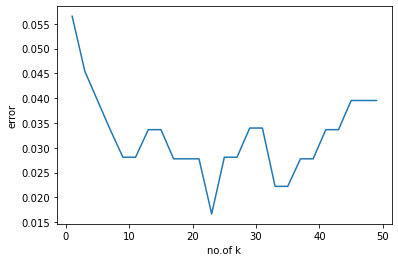

In [50]:
plt.plot(neighbors,mse)
plt.xlabel("no.of k")
plt.ylabel("error")
plt.show()

In [51]:
# minimum error at 23

In [52]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9814814814814815
